### MSDS-570 Project Step 1

#### Data Preprocessing

##### Dataset: hospital_readmissions.csv (Kaggle)

#### Data Features - Names & Descriptions
- "age" : age bracket of the patient
- "time_in_hospital" : days (from 1 to 14)
- "n_procedures" : number of procedures performed during the hospital stay
- "n_lab_procedures" : number of laboratory procedures performed during the hospital stay
- "n_medications" : number of medications administered during the hospital stay
- "n_outpatient" : number of outpatient visits in the year before a hospital stay
- "n_inpatient" : number of inpatient visits in the year before the hospital stay
- "n_emergency" : number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" : the specialty of the admitting physician
- "diag_1" : primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" : secondary diagnosis
- "diag_3" : additional secondary diagnosis
- "glucose_test" : whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" : whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" : whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" : whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" : if the patient was readmitted at the hospital ('yes' or 'no')

### Importing the Libraries

In [1]:
! pip install squarify 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import squarify 

### Reading the data 

In [3]:
# Load the CSV file
readmissions_data = pd.read_csv('hospital_readmissions.csv')

#Displaying the first 5 rows to see what the data looks like
readmissions_data .head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [4]:
readmissions_data.shape

(25000, 17)

In [5]:
#No missing values 

print(readmissions_data.info(verbose= True))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [6]:
 # Checking for null values
readmissions_data.isnull().sum() 

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [7]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values

readmissions_data.describe ()


,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [8]:
# Drop duplicates rows there are no duplicates in the dataset
readmissions_data = readmissions_data.drop_duplicates()
readmissions_data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no


In [9]:
readmissions_data.shape

(25000, 17)

In [10]:
# Data cleasning and handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
readmissions_data['medical_specialty'] = imputer.fit_transform(readmissions_data[['medical_specialty']])

readmissions_data.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [11]:
readmissions_data['readmitted'] = readmissions_data['readmitted'].map({'yes': 1, 'no': 0})

In [12]:
age_readmissions =readmissions_data.groupby('age')['readmitted'].mean().sort_values(ascending=False)
print(age_readmissions)

age
[80-90)     0.495793
[70-80)     0.487933
[60-70)     0.468459
[40-50)     0.445103
[50-60)     0.441599
[90-100)    0.421333
Name: readmitted, dtype: float64


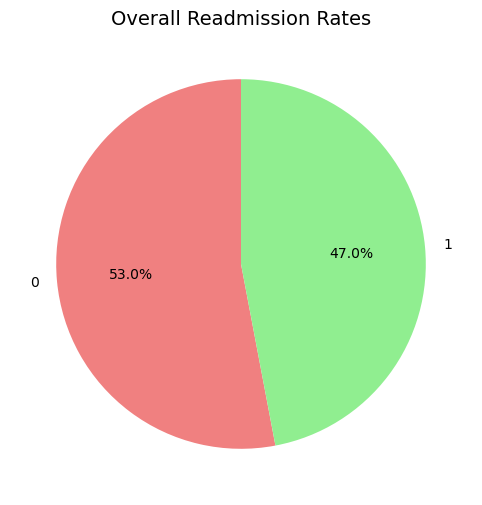

In [24]:
#Readmission Rates: A majority of the cases do not result in readmissions, as shown by the pie chart.
# Readmission Rates
plt.figure(figsize=(8, 6))
readmissions_data['readmitted'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Overall Readmission Rates', fontsize=14)
plt.ylabel('')  # Hides the y-axis label for better clarity
plt.show()

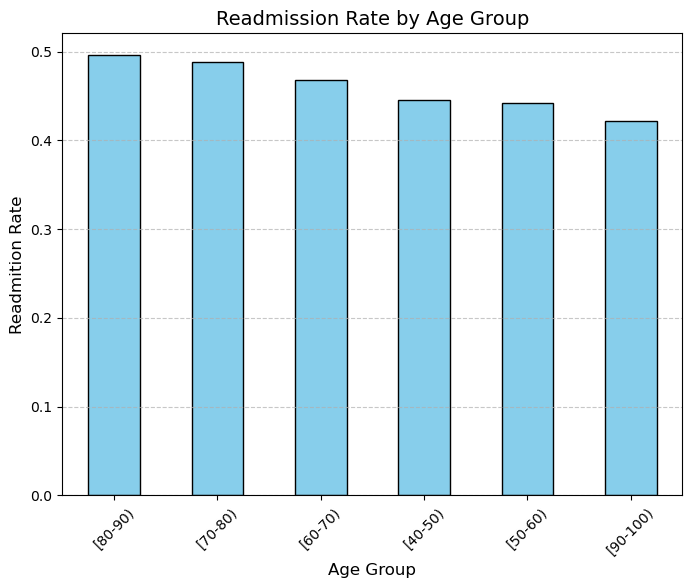

In [13]:
import matplotlib.pyplot as plt
#Which factors are most strongly associated with hospital readmissions (age, number of medications, or prior inpatient visits)?
#readmitted = readmitted.count(1)
#Distribution of Age Groups: The dataset has a higher number of patients in older age groups, particularly those aged 70–80.
# Avg of readmission rate by age group
plt.figure(figsize=(8, 6))
age_readmissions.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Readmission Rate by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Readmition Rate', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()





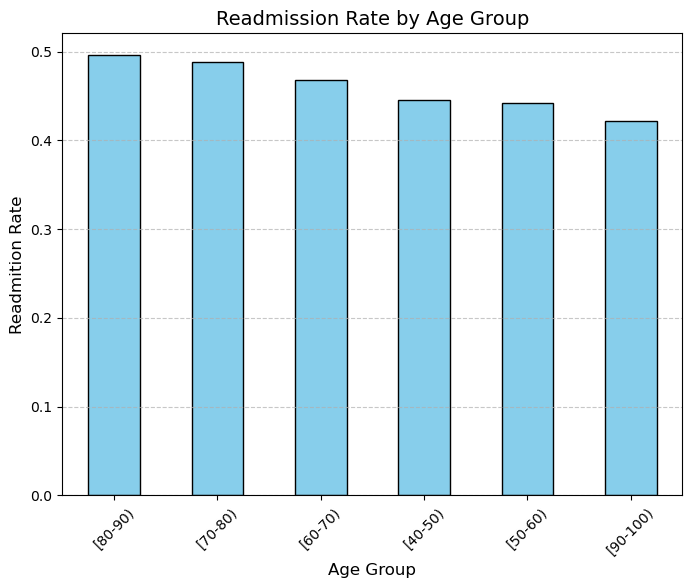

In [14]:
# Avg of readmission rate by age group
plt.figure(figsize=(8, 6))
age_readmissions.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Readmission Rate by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Readmition Rate', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


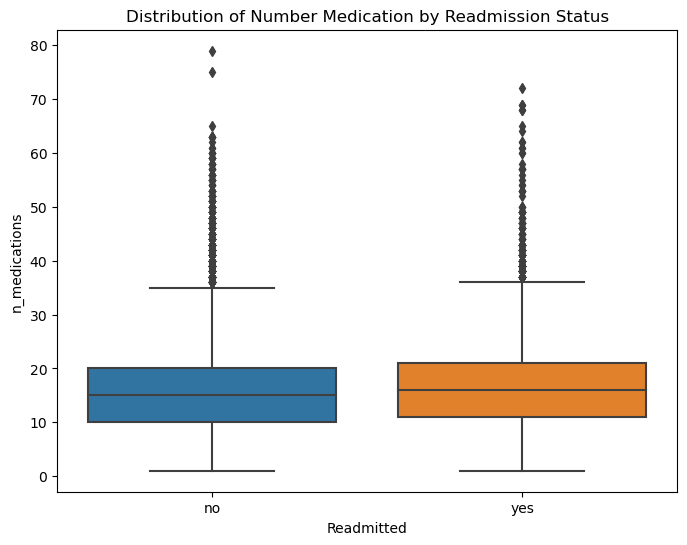

In [15]:
# There is no difference between yes and no and the number of medication.
readmissions_data['readmitted'] = readmissions_data['readmitted'].map({1:'yes', 0:'no'})

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(data=readmissions_data, x='readmitted', y='n_medications')
plt.title(f'Distribution of Number Medication by Readmission Status')
plt.xlabel('Readmitted')
plt.ylabel('n_medications')
plt.show()

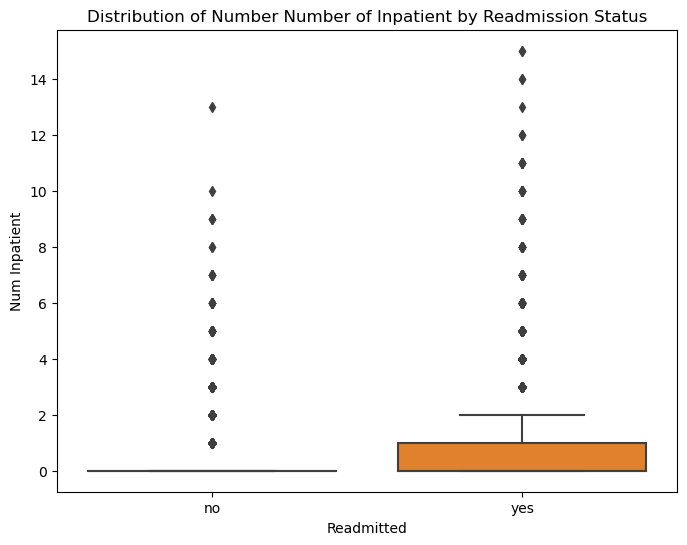

In [16]:
#"n_inpatient" : number of inpatient visits in the year before the hospital stay

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(data=readmissions_data, x='readmitted', y='n_inpatient')
plt.title(f'Distribution of Number Number of Inpatient by Readmission Status')
plt.xlabel('Readmitted')
plt.ylabel('Num Inpatient')
plt.show()

<Figure size 1200x600 with 0 Axes>

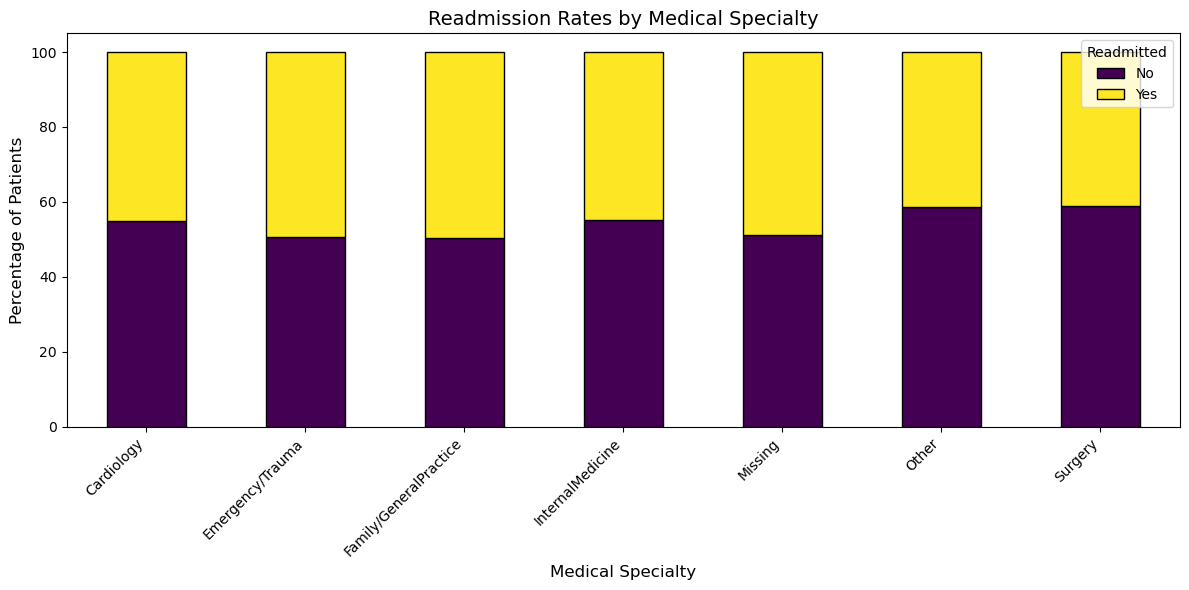

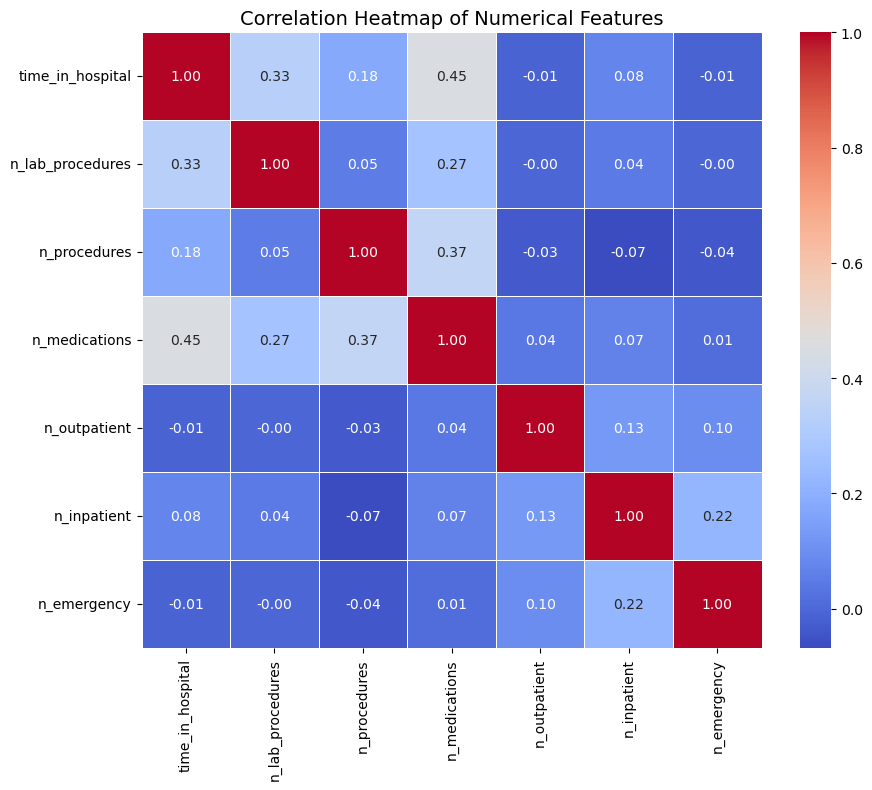

In [17]:
# Readmission Rates by Medical Specialty
plt.figure(figsize=(12, 6))
readmission_by_specialty = readmissions_data.groupby('medical_specialty')['readmitted'].value_counts(normalize=True).unstack() * 100
readmission_by_specialty.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis', edgecolor='black')
plt.title('Readmission Rates by Medical Specialty', fontsize=14)
plt.xlabel('Medical Specialty', fontsize=12)
plt.ylabel('Percentage of Patients', fontsize=12)
plt.legend(title='Readmitted', labels=['No', 'Yes'], fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Correlation Heatmap for Numerical Features
import seaborn as sns

# Select numerical columns for correlation analysis
numerical_cols = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 
                  'n_outpatient', 'n_inpatient', 'n_emergency']
correlation_matrix = readmissions_data[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()


#### How does the number of ER relate to readmission rate

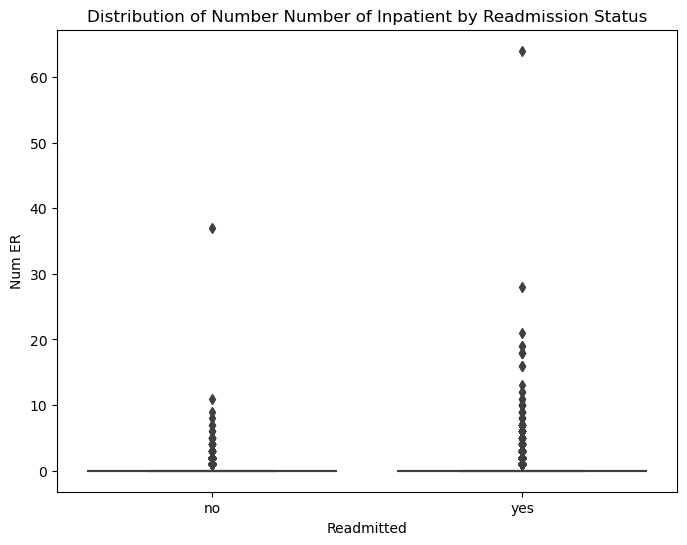

In [18]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(data=readmissions_data, x='readmitted', y='n_emergency')
plt.title(f'Distribution of Number Number of Inpatient by Readmission Status')
plt.xlabel('Readmitted')
plt.ylabel('Num ER')
plt.show()


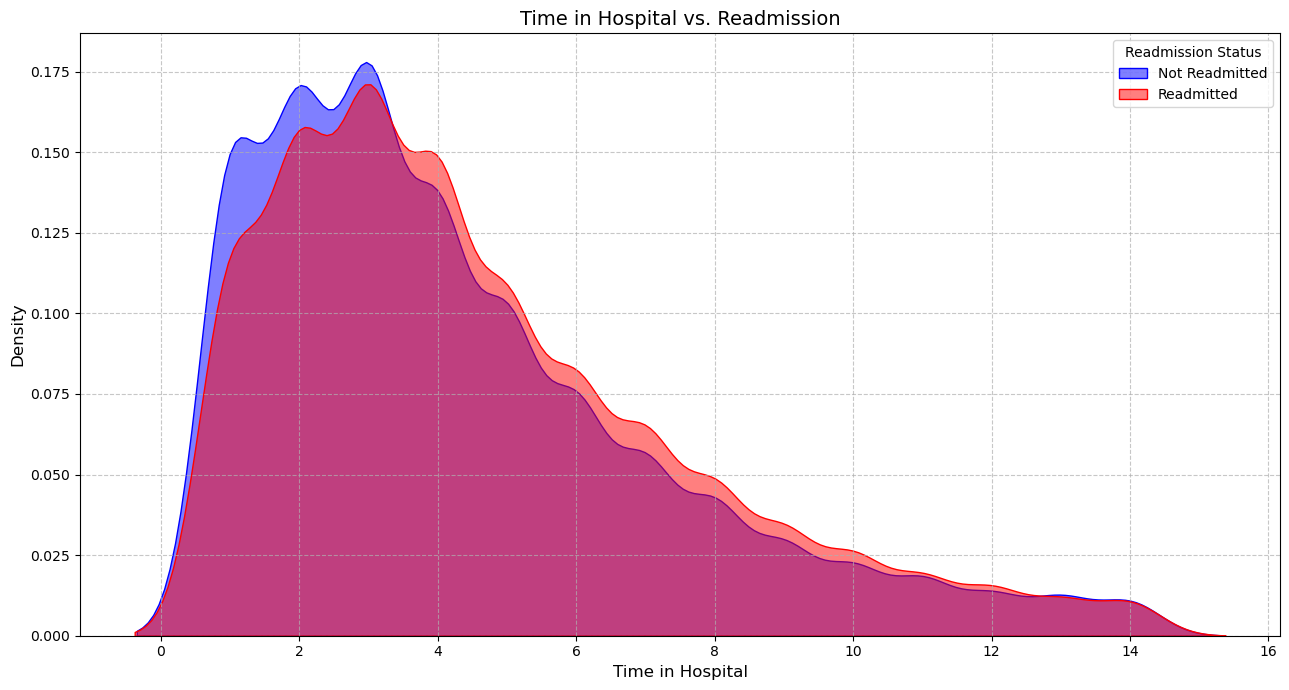

In [19]:
#readmissions_data['readmitted'] = readmissions_data['readmitted'].map({'yes': 1, 'no': 0})

import seaborn as sns
import matplotlib.pyplot as plt

ig = plt.figure(figsize=(13, 7))
sns.kdeplot(
    readmissions_data.loc[readmissions_data['readmitted'] == 'no', 'time_in_hospital'],
    color='b',
    label='Not Readmitted',
    fill=True,
    alpha=0.5
)
sns.kdeplot(
    readmissions_data.loc[readmissions_data['readmitted'] == 'yes', 'time_in_hospital'],
    color='r',
    label='Readmitted',
    fill=True,
    alpha=0.5
)
plt.xlabel('Time in Hospital', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Time in Hospital vs. Readmission', fontsize=14)
plt.legend(title='Readmission Status')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


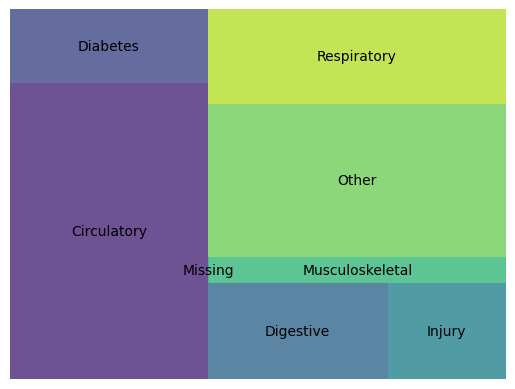

In [20]:
# Create the treemap
readmissions_data['readmitted'] = readmissions_data['readmitted'].map({'yes': 1, 'no': 0})

treemap_data = readmissions_data.groupby('diag_1').agg(readmission_count=('readmitted', 'sum')).reset_index()

squarify.plot(sizes=treemap_data['readmission_count'], label=treemap_data['diag_1'], alpha=0.8, color=sns.color_palette('viridis', len(treemap_data)))
plt.axis('off')
plt.show() 

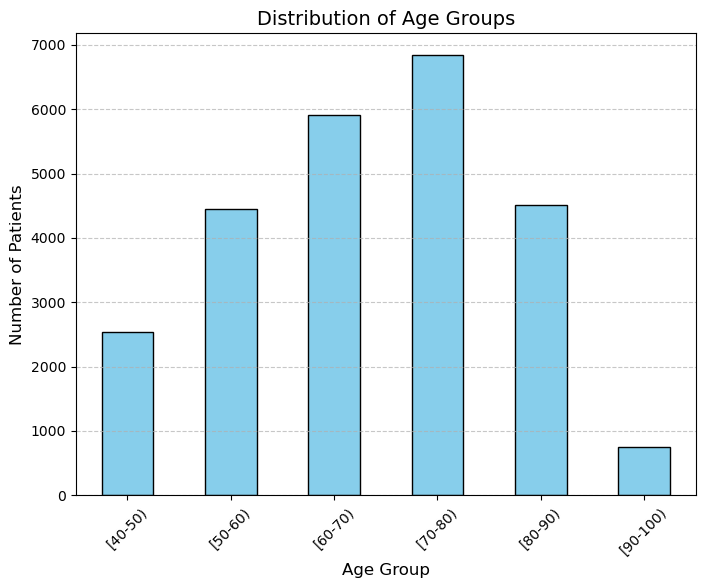

In [23]:
import matplotlib.pyplot as plt

# Distribution of Age Groups
plt.figure(figsize=(8, 6))
readmissions_data['age'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Age Groups', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




### The visualizations provide the following insights:

* Distribution of Age Groups: The dataset has a higher number of patients in older age groups, particularly those aged 70–80.
* Readmission Rates: A majority of the cases do not result in readmissions, as shown by the pie chart.

### Readmission Rates by Medical Specialty:

* The stacked bar chart highlights how different medical specialties contribute to readmission rates. Some specialties have notably higher proportions of readmissions.
### Correlation Heatmap of Numerical Features:

* The heatmap shows relationships between numerical attributes such as time in the hospital, number of procedures, and outpatient visits.
* Stronger correlations could help identify factors that influence readmissions.